In [88]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from itertools import product
import numpy as np
import pandas as pd

In [89]:
data = pd.read_excel('data/QualidadeARO3.xlsx')
data = data.drop(columns='Ihavo')
rng = pd.date_range('1/1/2020 00:00', periods=8784, freq='1H')
data.index = rng

## 1. Entrecampos Analysis

/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


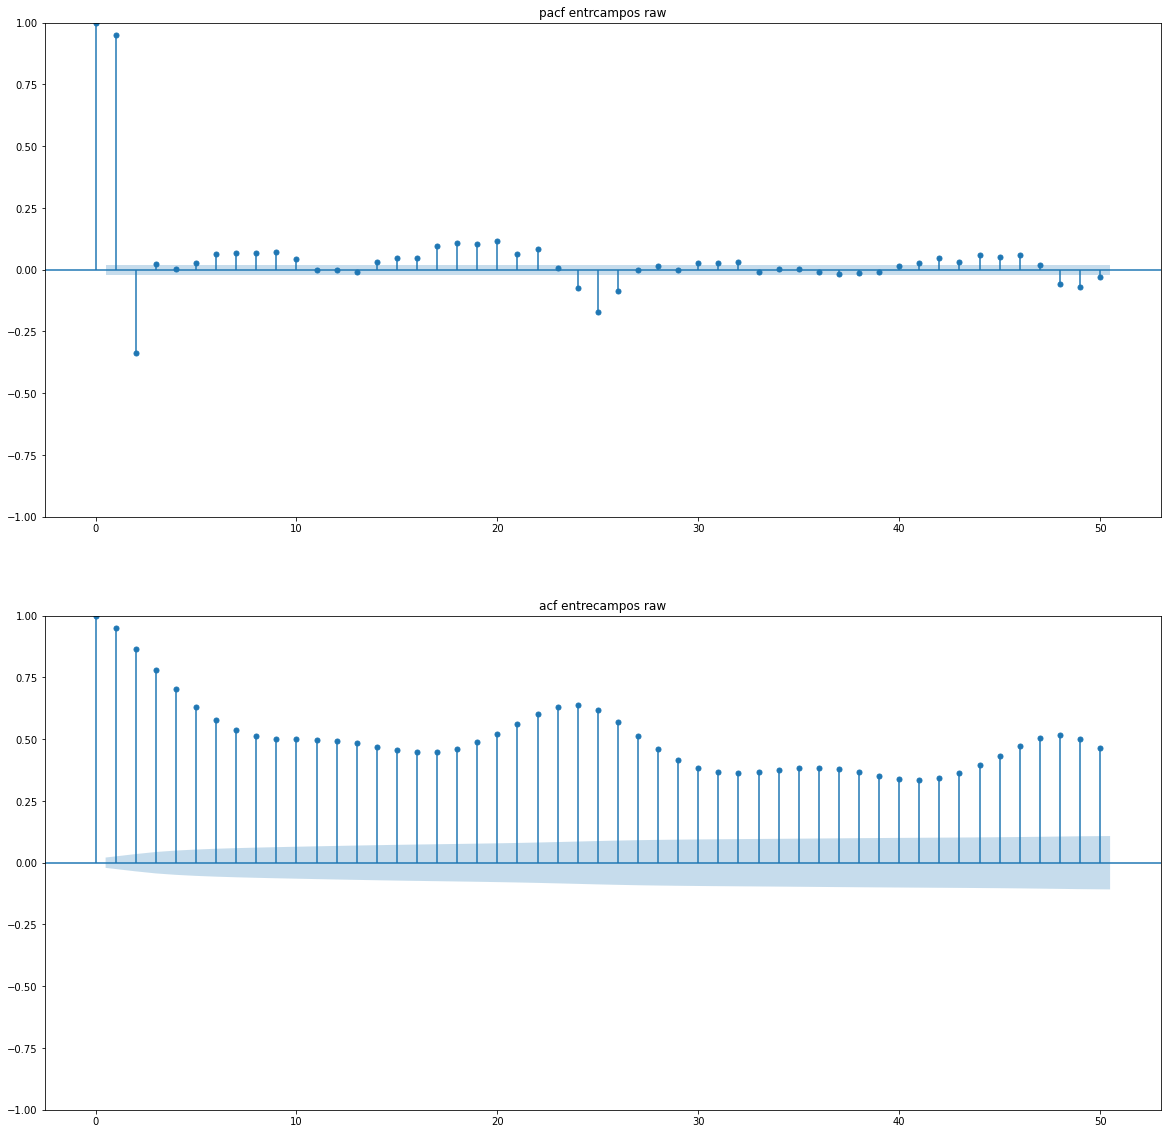

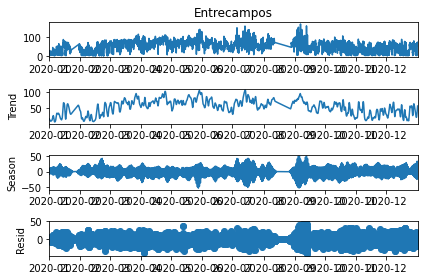

In [90]:
#entrecampos raw
entrecampos = data.Entrecampos

fig = plt.figure(figsize=(20,20))

plot_pacf(entrecampos, ax=plt.subplot(2, 1, 1), lags=50, title='pacf entrcampos raw')
plot_acf(entrecampos, ax=plt.subplot(2, 1, 2), lags=50, title='acf entrecampos raw')

res = STL(entrecampos).fit()
res.plot()
plt.show()


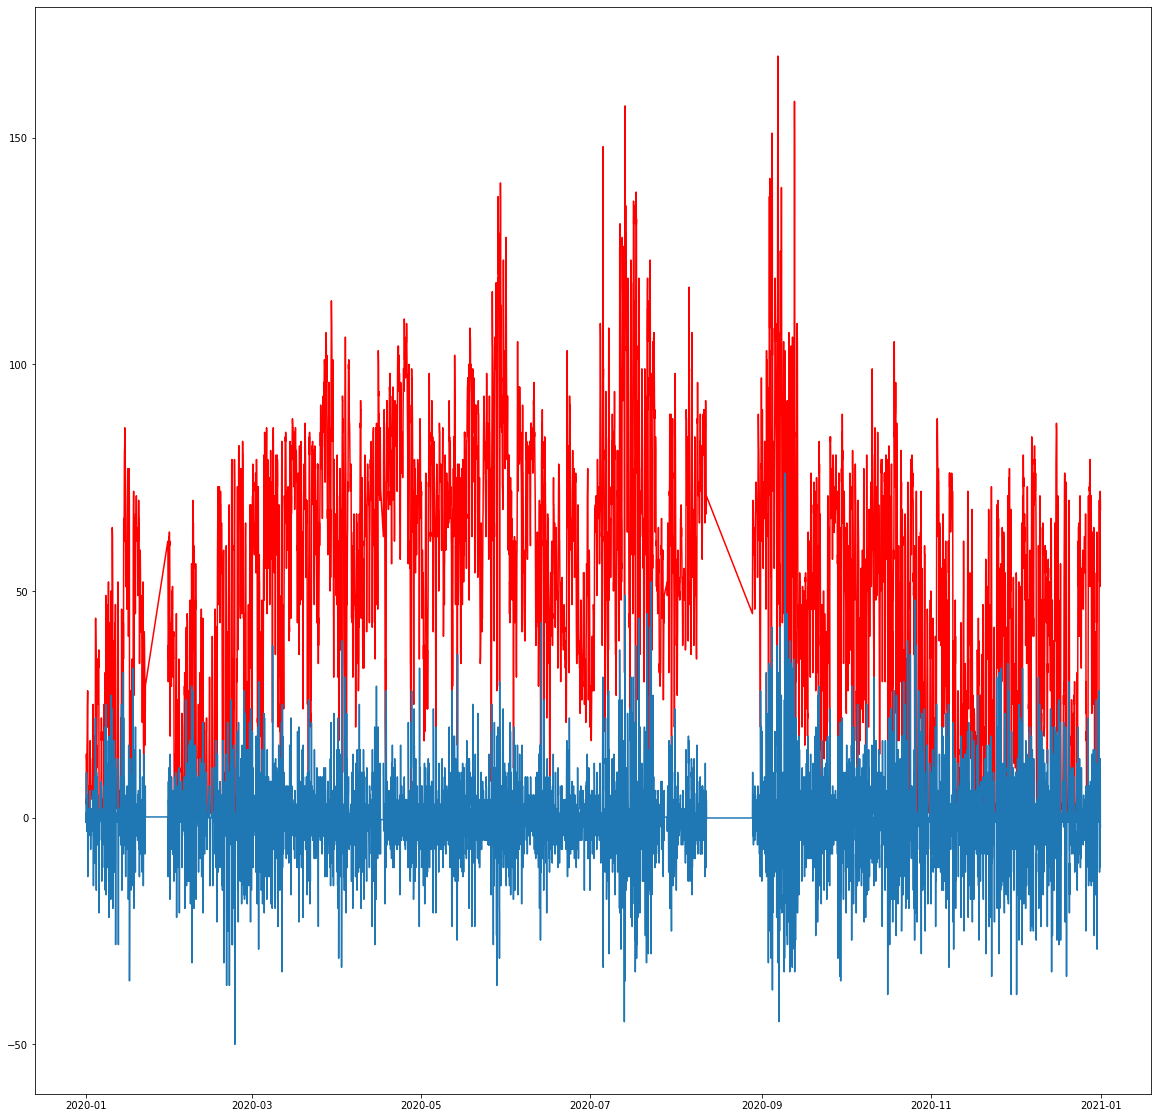

/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


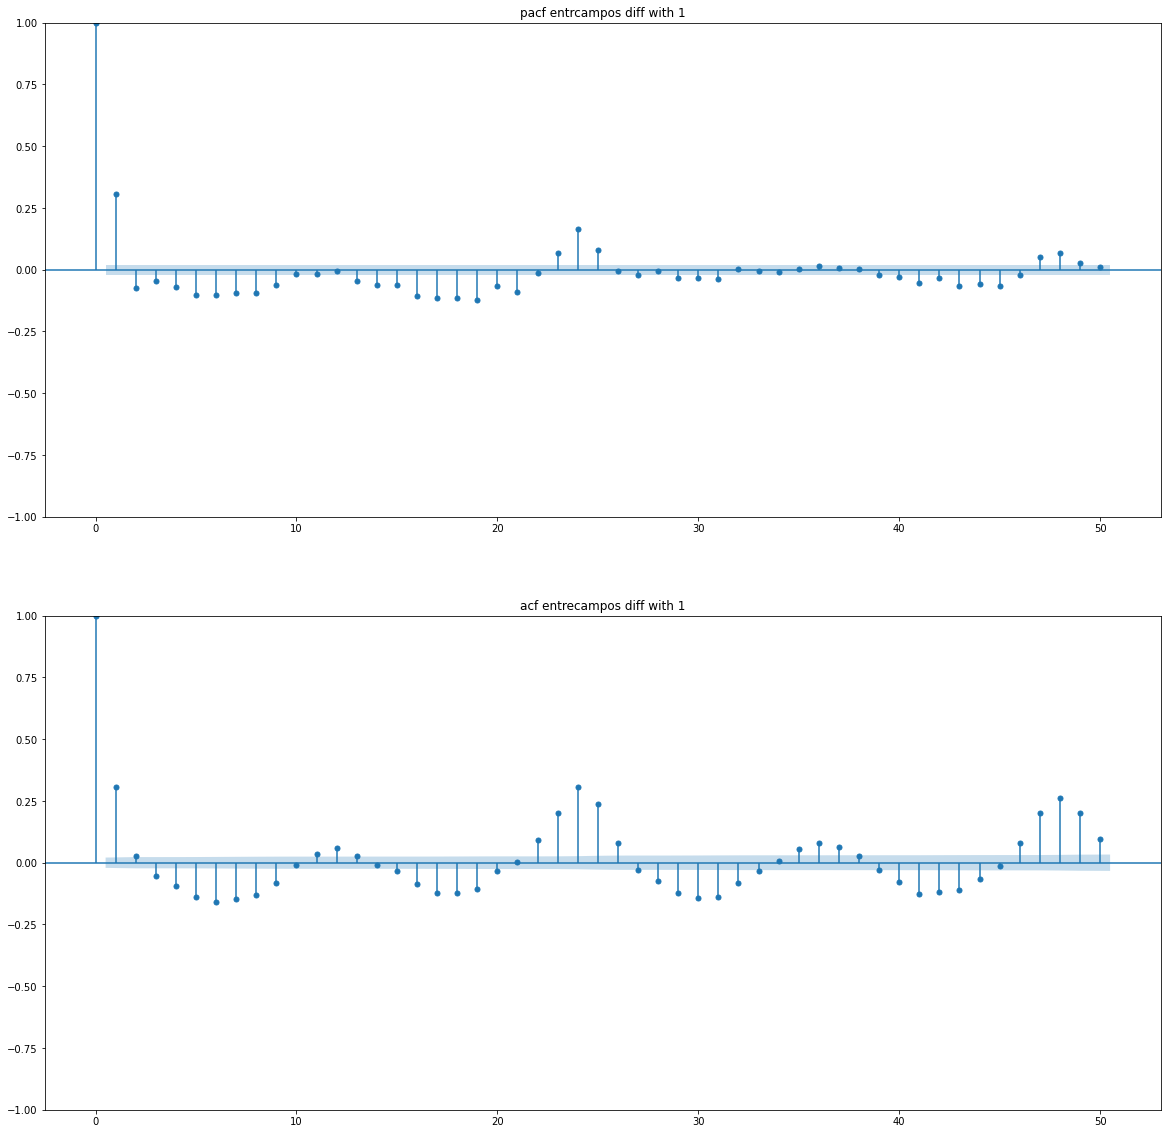

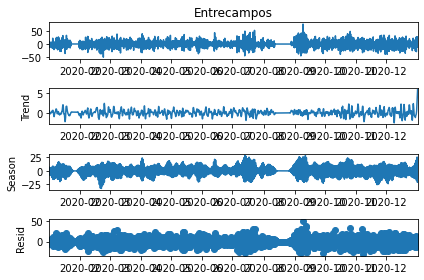

In [91]:
#entrecampos differencing 1
entrecampos = entrecampos.diff()
entrecampos = entrecampos[1:]

fig = plt.figure(figsize=(20,20))
plt.plot(data.index, data['Entrecampos'], color='red')
plt.plot(entrecampos)
plt.show()

fig2 = plt.figure(figsize=(20,20))
#pacf, acf plots
plot_pacf(entrecampos, ax=plt.subplot(2, 1, 1), lags=50, title='pacf entrcampos diff with 1')
plot_acf(entrecampos, ax=plt.subplot(2, 1, 2), lags=50, title='acf entrecampos diff with 1')
#decomposition plot
res = STL(entrecampos).fit()
res.plot()
plt.show()



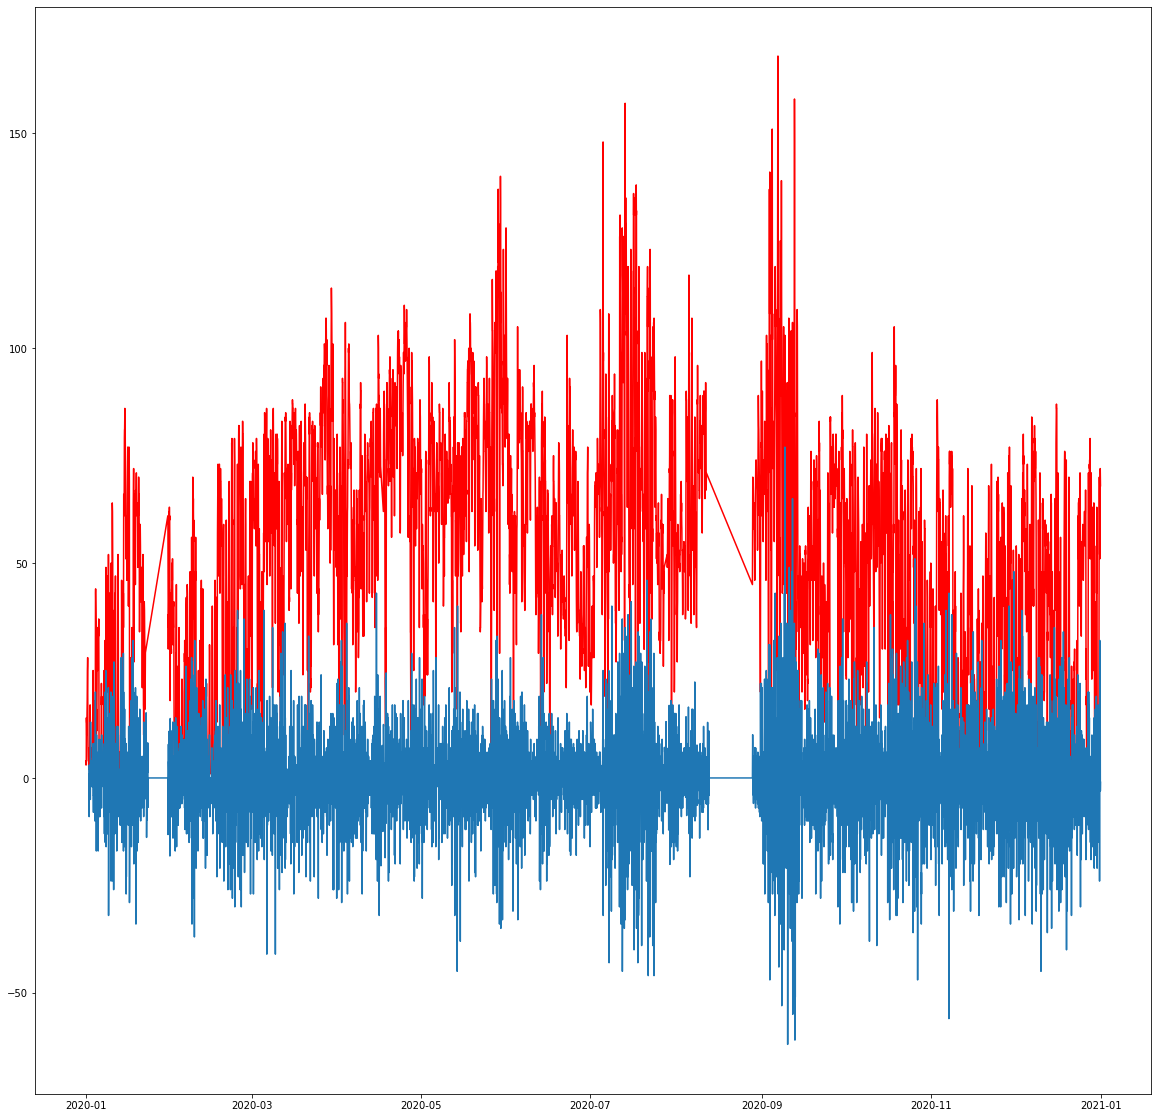

/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


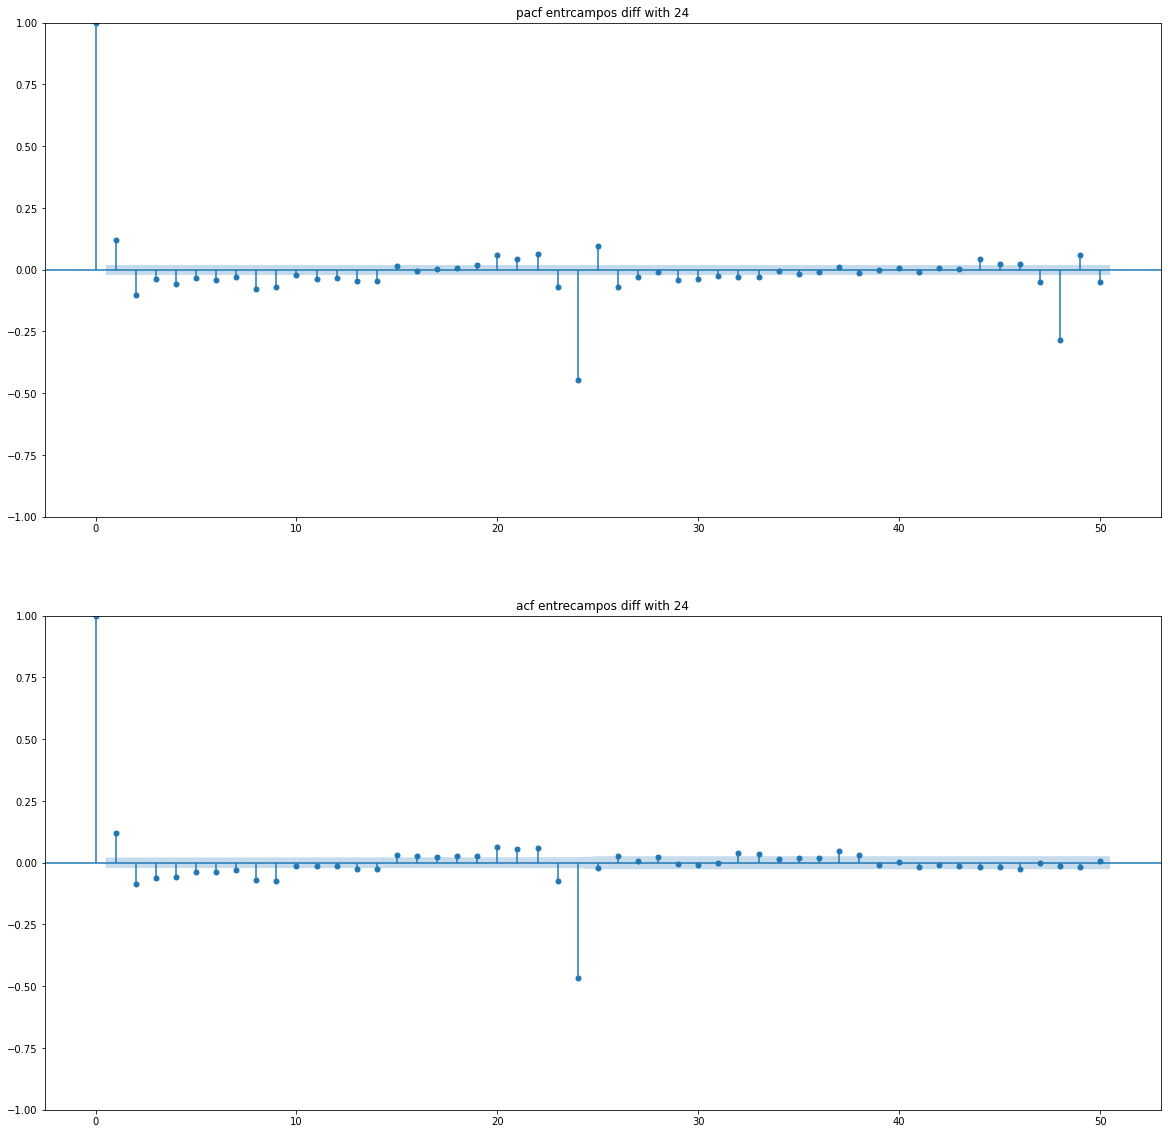

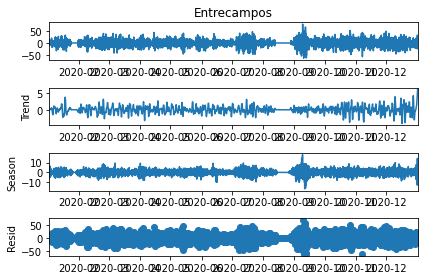

In [92]:
#entrecampos differencing 24
entrecampos = entrecampos.diff(24)
entrecampos = entrecampos[24:]

fig = plt.figure(figsize=(20,20))
plt.plot(data.index, data['Entrecampos'], color='red')
plt.plot(entrecampos)
plt.show()

#pacf, acf plots
fig2 = plt.figure(figsize=(20,20))
plot_pacf(entrecampos, ax=plt.subplot(2, 1, 1), lags=50, title='pacf entrcampos diff with 24')
plot_acf(entrecampos, ax=plt.subplot(2, 1, 2), lags=50, title='acf entrecampos diff with 24')
#decomposition plot
res = STL(entrecampos).fit()
res.plot()
plt.show()

# Diff only 24 

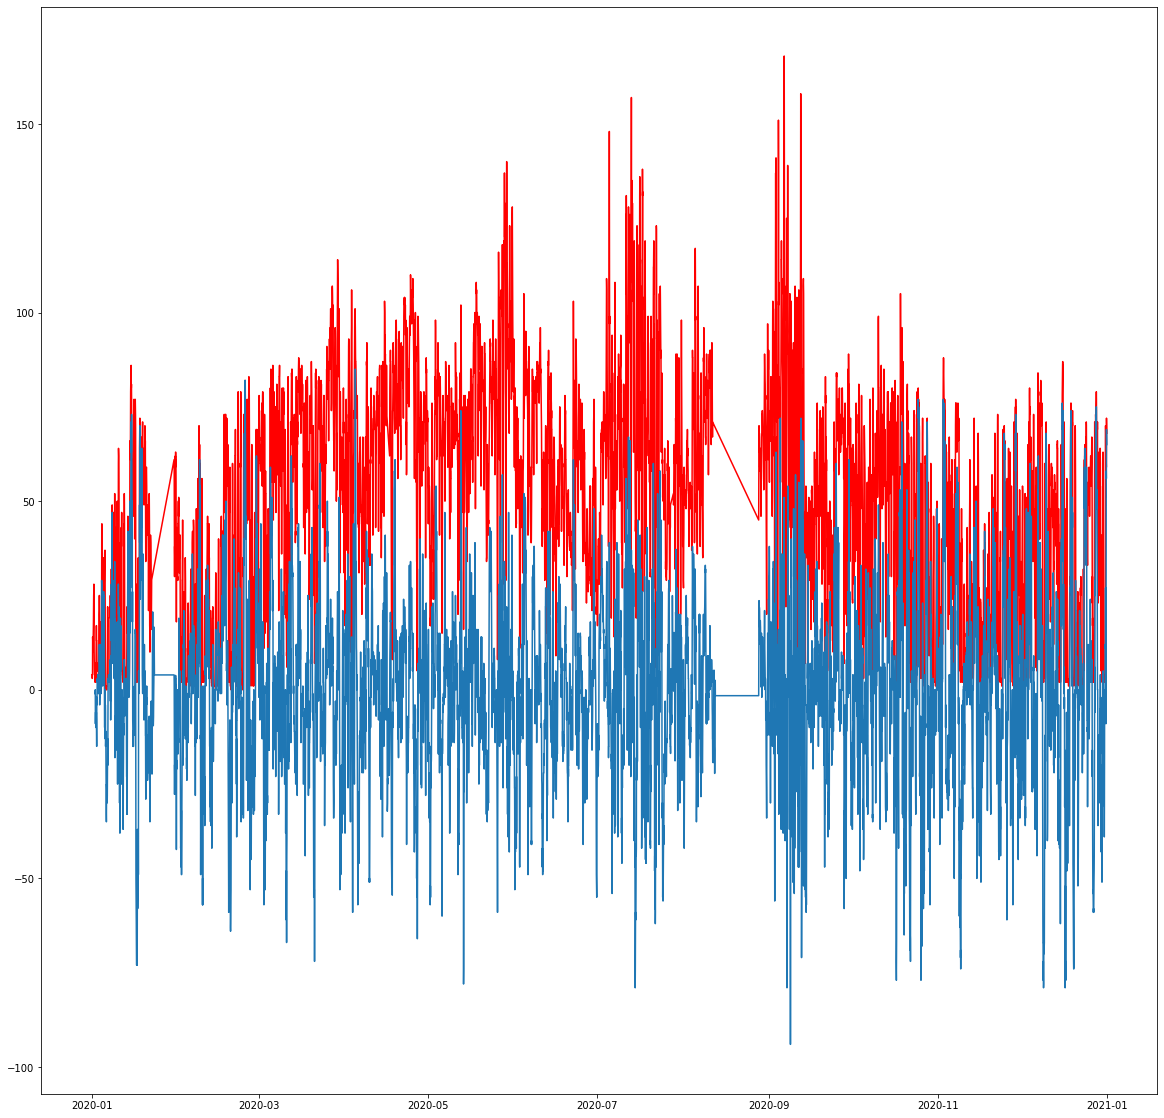

/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


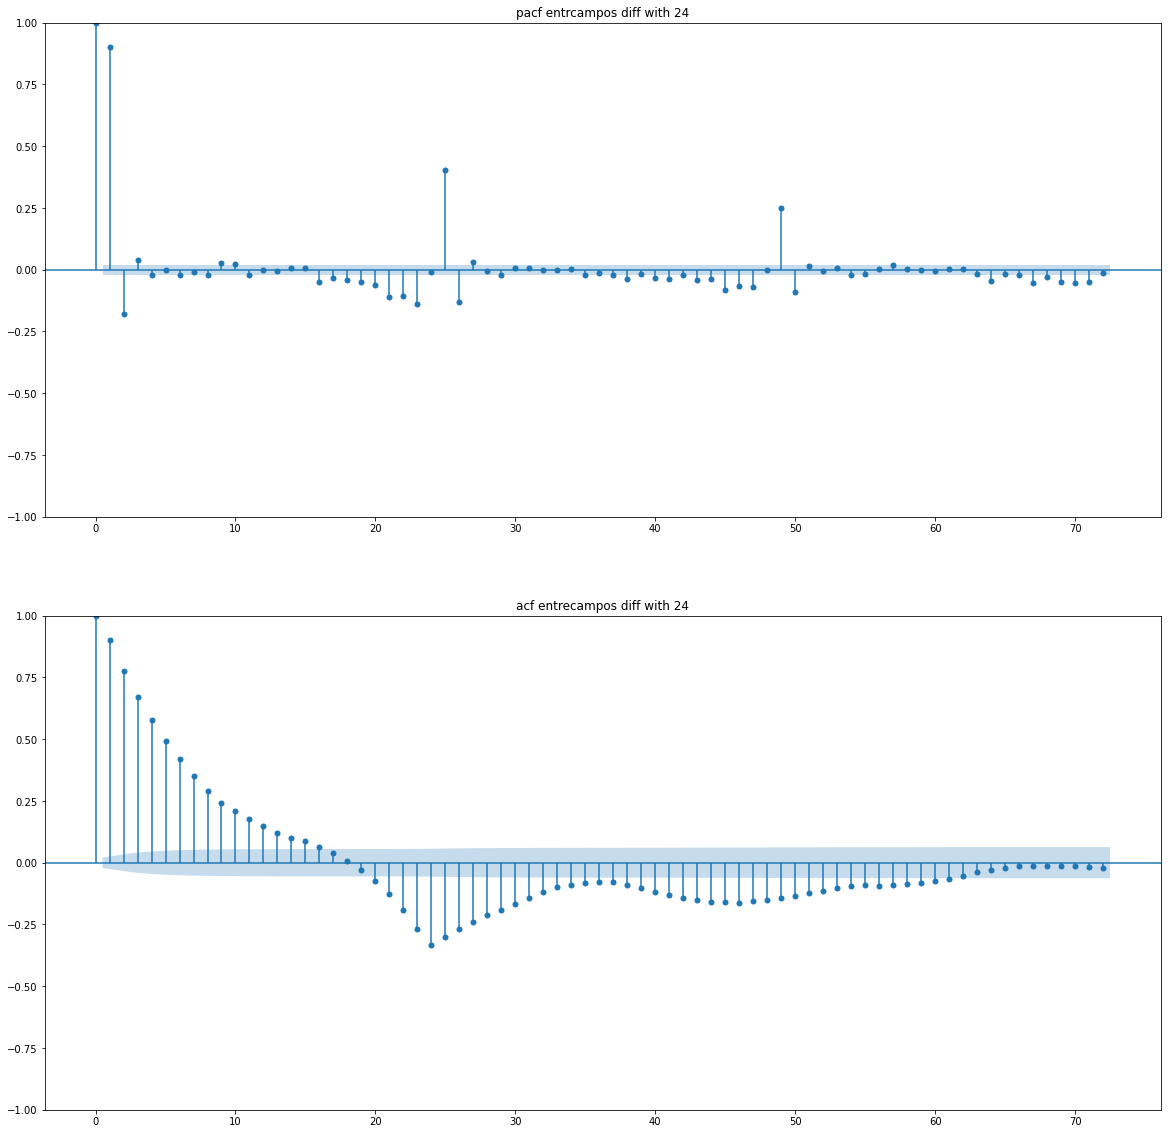

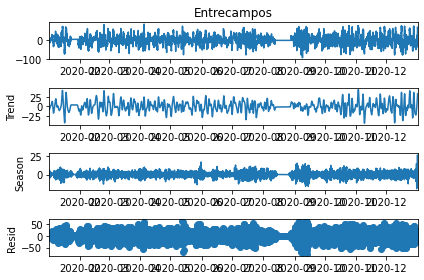

In [94]:
# #Entrecampos diff only 24
entrecampos = data.Entrecampos
entrecampos = entrecampos.diff(24)
entrecampos = entrecampos[24:]

fig = plt.figure(figsize=(20,20))
plt.plot(data.index, data['Entrecampos'], color='red')
plt.plot(entrecampos)
plt.show()

#pacf, acf plots
fig2 = plt.figure(figsize=(20,20))
plot_pacf(entrecampos, ax=plt.subplot(2, 1, 1), lags=72, title='pacf entrcampos diff with 24')
plot_acf(entrecampos, ax=plt.subplot(2, 1, 2), lags=72, title='acf entrecampos diff with 24')
#decomposition plot
res = STL(entrecampos).fit()
res.plot()
plt.show()

In [96]:
def optimize_SARIMA(parameters_list, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, d, P, Q, D, s) tuples
        p - AR order (up to X_{t-p})
        q - MA order (up to Z_{t-q})
        d - integration order
        P - AR for seasonal
        Q - MA for seasonal
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable (time series data to fit)
    """
    
    results = []
    
    for param in parameters_list:
        try: 
            model = SARIMAX(exog, order=(param[0:2]), seasonal_order=(param[3:])).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,d)x(P,Q,D,s)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [97]:
p = range(0, 2, 1)
q = range(0, 2, 1)
d = range(0, 2, 1)
P = range(0, 2, 1)
Q = range(0, 2, 1)
D = range(0, 2, 1)
s = range(24, 25, 1)

parameters = product(p, q, d, P, Q, D, s)
parameters_list = list(parameters)
print(len(parameters_list))
print(parameters_list)

64
[(0, 0, 0, 0, 0, 0, 24), (0, 0, 0, 0, 0, 1, 24), (0, 0, 0, 0, 1, 0, 24), (0, 0, 0, 0, 1, 1, 24), (0, 0, 0, 1, 0, 0, 24), (0, 0, 0, 1, 0, 1, 24), (0, 0, 0, 1, 1, 0, 24), (0, 0, 0, 1, 1, 1, 24), (0, 0, 1, 0, 0, 0, 24), (0, 0, 1, 0, 0, 1, 24), (0, 0, 1, 0, 1, 0, 24), (0, 0, 1, 0, 1, 1, 24), (0, 0, 1, 1, 0, 0, 24), (0, 0, 1, 1, 0, 1, 24), (0, 0, 1, 1, 1, 0, 24), (0, 0, 1, 1, 1, 1, 24), (0, 1, 0, 0, 0, 0, 24), (0, 1, 0, 0, 0, 1, 24), (0, 1, 0, 0, 1, 0, 24), (0, 1, 0, 0, 1, 1, 24), (0, 1, 0, 1, 0, 0, 24), (0, 1, 0, 1, 0, 1, 24), (0, 1, 0, 1, 1, 0, 24), (0, 1, 0, 1, 1, 1, 24), (0, 1, 1, 0, 0, 0, 24), (0, 1, 1, 0, 0, 1, 24), (0, 1, 1, 0, 1, 0, 24), (0, 1, 1, 0, 1, 1, 24), (0, 1, 1, 1, 0, 0, 24), (0, 1, 1, 1, 0, 1, 24), (0, 1, 1, 1, 1, 0, 24), (0, 1, 1, 1, 1, 1, 24), (1, 0, 0, 0, 0, 0, 24), (1, 0, 0, 0, 0, 1, 24), (1, 0, 0, 0, 1, 0, 24), (1, 0, 0, 0, 1, 1, 24), (1, 0, 0, 1, 0, 0, 24), (1, 0, 0, 1, 0, 1, 24), (1, 0, 0, 1, 1, 0, 24), (1, 0, 0, 1, 1, 1, 24), (1, 0, 1, 0, 0, 0, 24), (1, 0, 1, 0,

In [98]:
result_df = optimize_SARIMA(parameters_list, entrecampos)
result_df

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements